In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sys
import os
from funcs import *
from simulator import *
import seaborn as sns

In [2]:
def score_geral(namefile):
    entrada = open(f'in/{namefile}.txt', 'r')
    saida = open(f'out/{namefile}.out', 'w')

    D,I,S,V,F, sts, cars, inters = pega_input(entrada.readline)
    schedule = sol_batata(D,I,S,V,F, sts, cars, inters)
    output = form_out(schedule)[:-1]
    bkp_cars = cars.copy()
    total, finished_cars = score(D, F, sts, cars, inters, schedule)
    #print(f'score: {total:,}')
    return cars, bkp_cars, finished_cars, total, sts, inters, schedule, total
cars, bkp_cars, finished_cars, total, sts, inters, schedule, total = score_geral("e")

score: 619,739


In [3]:
# Cada linha é um carro, cada coluna é uma estatística do carro
def data_car(cars, sts, bkp_cars):
    data = []
    cars.update(finished_cars)
    for car in cars:
        #print(cars[car])
        path = bkp_cars[car]#['path']
        qtde_ruas = len(path)# - 1
        
        total_tam_ruas = 0
        for st in path[1:]:
            dims = sts[st]['size']
            tam_rua = dims[2]
            total_tam_ruas += tam_rua
            #print(f'rua {st} : {dims}')
            
        ruas_intersec = 0
        for car2 in cars:
            path1 = set(path)      
            
            path2 = bkp_cars[car2]#['path']
            #qtde_ruas = len(path2) - 1
            path2 = set(path2)
            
            intersecs = len(path1.intersection(path2))
            ruas_intersec += intersecs
            
        sts_with_intersect = 0#{}
        for st in path:
            #st_has_intersect[st] = False 
            for car2 in cars:
                path = bkp_cars[car]#['path'] 
                if st in path:
                    #st_has_intersect[st] = True
                    sts_with_intersect += 1
                    break
        #print('sthasinter', st_has_intersect)
        score_car = cars[car]['score']
        #print(f'{car} : ruas: {qtde_ruas}, tamanhototal: {total_tam_ruas}')
        data.append([ car, qtde_ruas, total_tam_ruas, ruas_intersec, sts_with_intersect, score_car ])
    df = pd.DataFrame(data, columns=['Carro', 'Ruas', 'Tamanho total', 'Ruas em comum', 'Ruas com intersec', 'Score'])
    display(df.describe())
    #print(bkp_cars)
    #print(schedule)
    return df
df = data_car(cars, sts, bkp_cars)

,Carro,Ruas,Tamanho total,Ruas em comum,Ruas com intersec,Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.877000,43.683000,6.345000,1.877000,619.739000
std,288.819436,1.856156,96.407608,6.648773,1.856156,424.911236
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,249.750000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,499.500000,1.000000,0.000000,4.000000,1.000000,751.000000
75%,749.250000,1.000000,0.000000,6.000000,1.000000,977.250000
max,999.000000,10.000000,553.000000,45.000000,10.000000,1173.000000


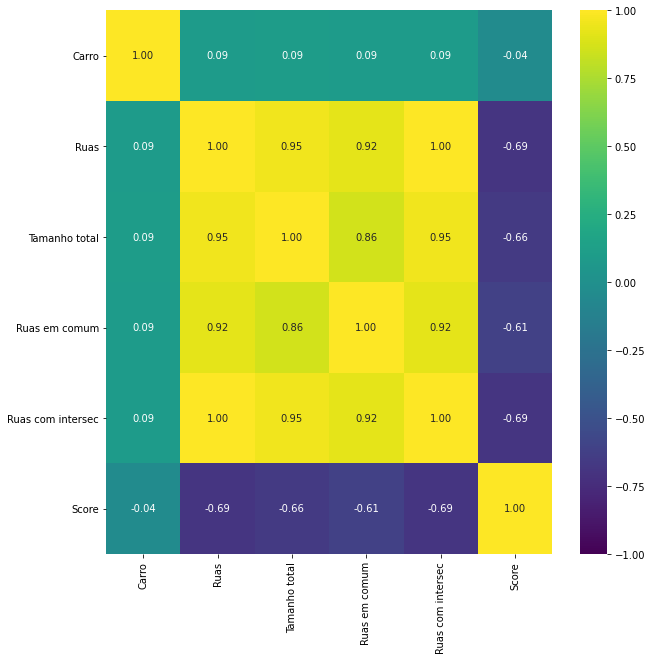

In [4]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1);

In [5]:
def data_sts(sts, cars, bkp_cars, inters):  
    data = []
    for st in sts:
        #print(sts[st])
        cars_with_st = 0
        score_st = 0
        for car in bkp_cars:
            if(st in set(bkp_cars[car])):
                cars_with_st += 1
                score_st += cars[car]['score']
        aux = sts[st]['size']
        tam_st = aux[2]
        coming = aux[0]
        going = aux[1]
        qtd_desembocam = len(inters[coming]['sts'])

        data.append([cars_with_st, tam_st, coming, going, qtd_desembocam, score_st])
    df_st = pd.DataFrame(data, columns=['Carros que passam por essa rua', 'Tamanho da Rua', 'Vem de', 'Vai para', 
            'Quantidade de ruas que desembocam nela', 'Score dos que passaram'])
    display(df_st.describe())
    return df_st
df_st = data_sts(sts, cars, bkp_cars, inters)

,Carros que passam por essa rua,Tamanho da Rua,Vem de,Vai para,Quantidade de ruas que desembocam nela,Score dos que passaram
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.880762,50.595190,311.374749,311.625251,63.374749,620.980962
std,1.680262,28.469034,165.300164,165.206086,107.658911,874.651560
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,26.000000,166.000000,166.250000,1.000000,0.000000
50%,2.000000,50.000000,332.000000,332.500000,1.000000,0.000000
75%,3.000000,75.000000,498.000000,498.750000,2.000000,1037.750000
max,9.000000,100.000000,499.000000,499.000000,250.000000,4975.000000


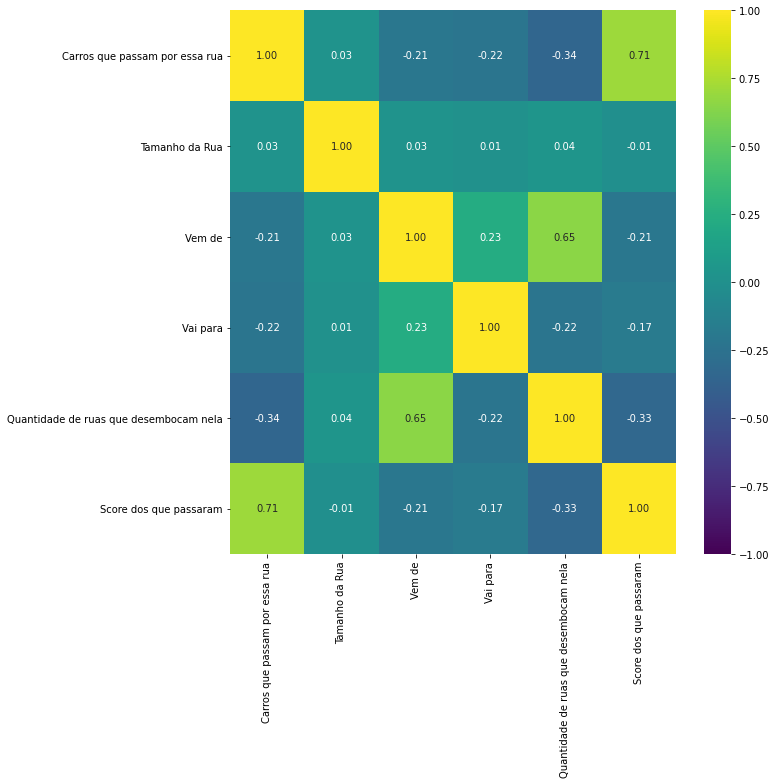

In [6]:
plt.figure(figsize=(10, 10))
corr = df_st.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1);
#print(bkp_cars)

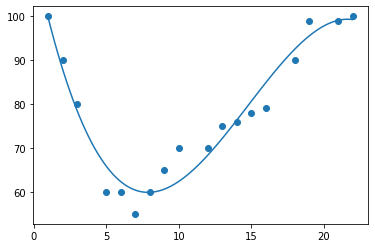

88.87331269697991


In [7]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show() 

#print(speed) 

In [9]:
def transform_schedule(schedule, score_t): 
    new_schedule = {}
    for _, value in schedule.items():
        progs = value['prog'].copy()
        for prog in progs:
            st_name = prog['st']
            t = prog['t']
            #prog['score'] = score
            new_schedule[st_name] = {'t': t, 'score': score_t}
    return new_schedule
#transform_schedule(schedule, total)

In [13]:
lista = []
for t in range(0,10):
    cars, bkp_cars, finished_cars, total, sts, inters, schedule, total = score_geral("e")
    schedule = transform_schedule(schedule, total)
    lista.append(schedule)
print(lista)

 {'t': 3, 'score': 624808}, 'efd-efe': {'t': 1, 'score': 624808}, 'efe-eff': {'t': 2, 'score': 624808}, 'ejj-eff': {'t': 3, 'score': 624808}, 'eff-efg': {'t': 3, 'score': 624808}, 'efg-efh': {'t': 1, 'score': 624808}, 'ejj-efh': {'t': 3, 'score': 624808}, 'efh-efi': {'t': 3, 'score': 624808}, 'efi-efj': {'t': 2, 'score': 624808}, 'ejj-efj': {'t': 1, 'score': 624808}, 'efj-ega': {'t': 3, 'score': 624808}, 'ega-egb': {'t': 2, 'score': 624808}, 'ejj-egb': {'t': 2, 'score': 624808}, 'egb-egc': {'t': 1, 'score': 624808}, 'egc-egd': {'t': 1, 'score': 624808}, 'ejj-egd': {'t': 1, 'score': 624808}, 'egd-ege': {'t': 3, 'score': 624808}, 'ege-egf': {'t': 1, 'score': 624808}, 'ejj-egf': {'t': 1, 'score': 624808}, 'egf-egg': {'t': 1, 'score': 624808}, 'egg-egh': {'t': 1, 'score': 624808}, 'ejj-egh': {'t': 2, 'score': 624808}, 'egh-egi': {'t': 3, 'score': 624808}, 'egi-egj': {'t': 2, 'score': 624808}, 'ejj-egj': {'t': 2, 'score': 624808}, 'egj-eha': {'t': 3, 'score': 624808}, 'eha-ehb': {'t': 1, 's